# Logistic Regression
This notebook implements a simple working example of logistic regression.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Define sigmoid function
def sigma(z):
    output = 1.0/(1.0+np.exp(-z))
    return output

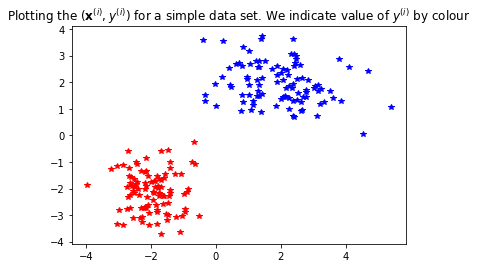

In [14]:
# Lets generate a toy example
mean_1 = [-2,-2]
cov_1 = [[0.5,0],[0,0.5]]
mean_2 = [2,2]
cov_2 = [[1.5,0],[0,0.5]]

# Generate the data using np.random library
X_1 = np.random.multivariate_normal(mean_1,cov_1,100)
X_2 = np.random.multivariate_normal(mean_2,cov_2,100)


X = np.concatenate([X_1,X_2],axis = 0) # concatenate data into single matrix
y = np.zeros([200,1])
y[100:200] = 1
N = 200 # number of data points

# Plot the data using pyplot
plt.plot(X_1[:,0],X_1[:,1],'r*')
plt.plot(X_2[:,0],X_2[:,1],'b*')
plt.title('Plotting the $(\mathbf{x}^{(i)},y^{(i)})$ for a simple data set. We indicate value of $y^{(i)}$ by colour')
plt.show()

It will be convenient to introduce the notation:
\begin{align}
h_{\mathbf{\theta},b}(\mathbf{x}) := \sigma(\boldsymbol{\theta}^{\top}\mathbf{x} + b)
\end{align}

In [15]:
def h(theta,b,x):
    return sigma(np.dot(theta,x) + b)

In [16]:
def TrainingLogisticRegression(theta_0,b_0,X,y,alpha,K_max):
    # Function for training logistic regression model
    # Inputs:
        # theta_0,b_0 : (random) initializations for parameters
        # X,y : labeled training data
        # alpha: step size/ learning rate
        # K_max: max number of iterations.
    theta = np.squeeze(theta_0)
    b = b_0
    N = X.shape[0]
    d = X.shape[1]
    loss_function_trajectory = np.zeros([K_max,1])
    for k in range(K_max):
        theta_grad = 0
        b_grad = 0
        loss_function_value = 0
        for i in range(N):
            theta_grad -= (y[i] - h(theta,b,X[i,:]))*X[i,:]
            b_grad -= y[i] - h(theta,b,X[i,:])
            loss_function_value += -y[i]*np.log(h(theta,b,X[i,:])) -(1-y[i])*np.log(1 - h(theta,b,X[i,:])) 
        theta -= alpha*theta_grad
        b -= alpha*b_grad
        loss_function_trajectory[k] = loss_function_value
        if k% 50 == 0:
            print(loss_function_value)
    return theta,b,loss_function_trajectory

In [24]:
## Testing this on our toy model

# Splitting data into test and train
All_indices = range(0,200)
Train_indices = np.random.choice(All_indices,size=120,replace=False)
Test_indices = np.setdiff1d(All_indices,Train_indices)

X_train = X[Train_indices,:]
y_train = y[Train_indices]

X_test = X[Test_indices,:]
y_test = y[Test_indices,:]

# Initializing parameters
theta_0 = np.random.randn(2,1)
b_0 = np.random.randn(1)
alpha = 0.01
K_max = 500

# training
theta,b,loss_function_trajectory = TrainingLogisticRegression(theta_0,b_0,X_train,y_train,alpha,K_max)

[13.09064382]
[0.59046367]
[0.35133256]
[0.25748796]
[0.20582303]
[0.17264193]
[0.14933556]
[0.1319723]
[0.11848468]
[0.1076751]


In [25]:
# Lets examine the parameters
print(theta)
print(b)

[2.16144749 2.90685664]
[0.5251538]


In [26]:
def Classifier(theta,b,x):
    probability = h(theta,b,x) # = sigmoid(theta^{T}x - b)
    classification = np.round(probability) # if probability >= 0.5 then predict y = 1. if prob < 0.5 then predict y = 0
    return probability,classification

In [27]:
i = 7
probability, classification = Classifier(theta,b,X_test[i,:])
#print(classification)
#print(y[1])
print('Predicted Label is ' + str(int(classification)) + ' while the true label is ' + str(int(y_test[i])))

Predicted Label is 0 while the true label is 0


In [28]:
i = 23
score, classification = Classifier(theta,b,X_test[i,:])
#print(classification)
#print(y[1])
print('Predicted Label is ' + str(int(classification)) + ' while the true label is ' + str(int(y_test[i])))

Predicted Label is 0 while the true label is 0


In [29]:
total = 0

for i in range(0, 80):
    probability, classification = Classifier(theta, b, X_test[i,:])
    if classification == y_test[i]:
        total += 1

print(total / 80)

1.0


## Classification Boundary
- Observe that if $\boldsymbol{\theta}^{\top}\mathbf{x} + b = 0$ then $h_{\boldsymbol{\theta},b}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^{\top}\mathbf{x} + b) = \sigma(0) = \frac{1}{2}$. 
- This is the boundary between the two classes

\begin{align}
& \theta_1x_1 + \theta_2x_2 + b = 0 \\
\Rightarrow & \theta_2x_2 = -\theta_1x_1 - b \\
\Rightarrow & x_2 = \frac{-\theta_1}{\theta_2}x_1 - \frac{b}{\theta_2}
\end{align}

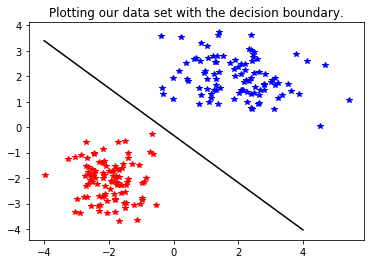

In [23]:
## Let's visualize the classification boundary
x_vals = np.linspace(-4,4,5000)
y_vals = -(theta[0]/theta[1])*x_vals - b/theta[0]
plt.plot(x_vals,y_vals,'k')
plt.plot(X_1[:,0],X_1[:,1],'r*')
plt.plot(X_2[:,0],X_2[:,1],'b*')
plt.title('Plotting our data set with the decision boundary.')
plt.show()